In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from loads import *
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

PATH_FOLDER = "MovieSummaries/"

# Plot for Country

## Bar chart for mean revenue

In [2]:
# Load the data
path = "csv_for_story/countries_df_grouped_jerry.csv"
movie_countries_df_grouped = pd.read_csv(path)

<ipython-input-3-ef8d9d0170f1>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Revenue with inflation', data=movie_countries_categories_sorted, palette=colors, ax=ax1)
<ipython-input-3-ef8d9d0170f1>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='log_revenues', data=movie_countries_categories_sorted, palette=colors, ax=ax2)


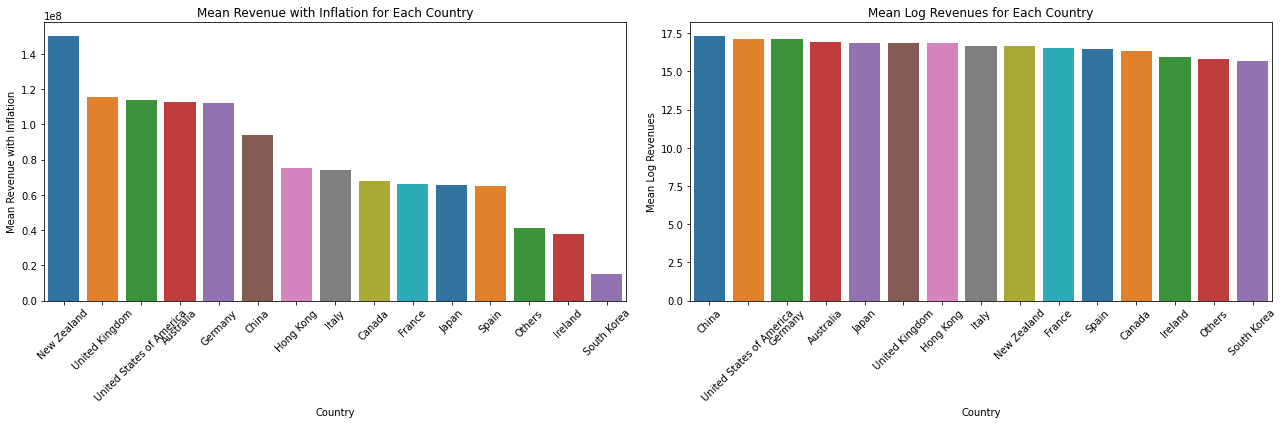

In [3]:
# Set a threshold count for the number of movies in a country
threshold = 50

# Select countries with a count greater than the threshold
top_movie_countries_df = movie_countries_df_grouped[movie_countries_df_grouped["count"] > threshold]

# Select countries with a count less than or equal to the threshold
other_movie_country = movie_countries_df_grouped[movie_countries_df_grouped["count"] <= threshold]

# Calculate the average revenue and log revenue of countries not in the list
others_revenue_inflation = (np.sum(other_movie_country['Revenue with inflation'] * other_movie_country['count'])) / other_movie_country['count'].sum()
others_revenue_log = (np.sum(other_movie_country['log_revenues'] * other_movie_country['count'])) / other_movie_country['count'].sum()

# Calculate the counts of countries not in the list
others_count = other_movie_country['count'].sum()

# Create a new row for 'Others' with the calculated average revenues
others_row = pd.DataFrame({
    'Country': ['Others'], 
    'count': [others_count], 
    'Revenue with inflation': [others_revenue_inflation],
    'log_revenues': [others_revenue_log]
})

# Concatenate the new row to the existing DataFrame
movie_countries_categories = pd.concat([top_movie_countries_df, others_row], ignore_index=True)

# Sort the DataFrame by 'Revenue with inflation' in descending order
movie_countries_categories_sorted = movie_countries_categories.sort_values('Revenue with inflation', ascending=False)

# Set up a multi-plot grid for two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Use different colors for each plot
colors = plt.cm.tab10.colors

# Create a bar plot for 'Revenue with inflation'
sns.barplot(x='Country', y='Revenue with inflation', data=movie_countries_categories_sorted, palette=colors, ax=ax1)
ax1.set_title('Mean Revenue with Inflation for Each Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Mean Revenue with Inflation')
ax1.tick_params(axis='x', rotation=45)

# Sort the DataFrame by 'log_revenues' in descending order
movie_countries_categories_sorted = movie_countries_categories.sort_values('log_revenues', ascending=False)

# Create a bar plot for 'log_revenues'
sns.barplot(x='Country', y='log_revenues', data=movie_countries_categories_sorted, palette=colors, ax=ax2)
ax2.set_title('Mean Log Revenues for Each Country')
ax2.set_xlabel('Country')
ax2.set_ylabel('Mean Log Revenues')
ax2.tick_params(axis='x', rotation=45)

# Ensure everything fits well in the plot area
plt.tight_layout()

# Show the plot
plt.show()

The mean revenue per country depicted in the bar chart shows substantial variation across different countries as origins. The United States of America, United Kingdom, and New Zealand demonstrate particularly high mean revenues, indicating a strong performance for films from these countries. Conversely, countries like France and Germany show relatively lower mean revenues, though they still contribute significantly to the global film industry. Especially New Zealand stands out with the highest mean revenue. In contrast, South Korea's mean revenue is on the lowest side. However, when considering the mean log revenue, a more balanced picture shows as the figures across countries are much closer to each other, with China having the highest mean log revenue.

In [4]:
# Load the data
path = "csv_for_story/countries_df_onehot_jerry.csv"
movie_countries_df = pd.read_csv(path)

<ipython-input-5-f9ae38e52789>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Country', y='log_revenues', data=filtered_df_log, ci=95, capsize=.2, palette='viridis', ax=axes[0, 0])
<ipython-input-5-f9ae38e52789>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='log_revenues', data=filtered_df_log, ci=95, capsize=.2, palette='viridis', ax=axes[0, 0])
<ipython-input-5-f9ae38e52789>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='log_revenues', data=filtered_df_log, palette='viridis', ax=axes[0, 1])
<ipython-input-5-f9ae38e52789>:39: FutureWarning: 

The `ci` parameter is deprecated. Use

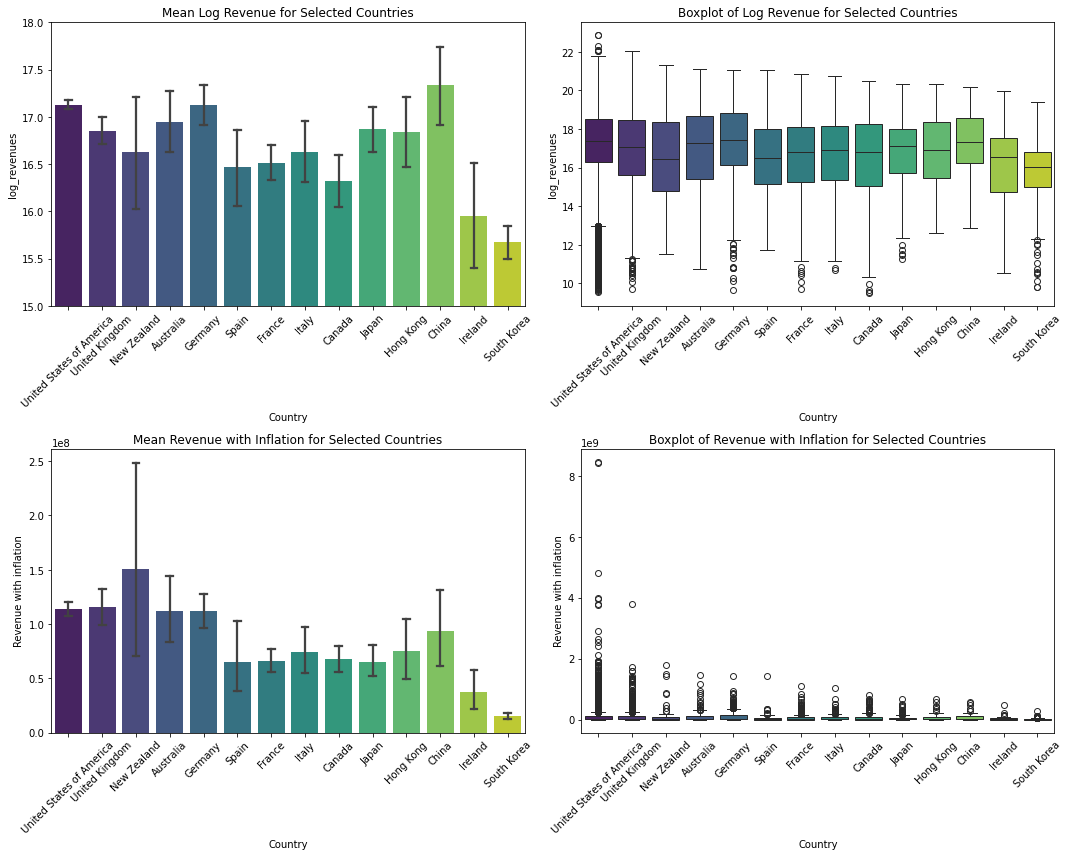

In [5]:
# Convert the string representation of the countries list into an actual list
movie_countries_df['Countries_List'] = movie_countries_df['Movie Countries'].apply(lambda x: ast.literal_eval(x))

# Define the selected countries
selected_countries = ['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 
                      'South Korea', 'Japan', 'Australia', 'Italy', 'Spain', 'Hong Kong', 'New Zealand', 
                      'Ireland', 'China']

# Create one-hot encoded columns for each selected country
for country in selected_countries:
    movie_countries_df[country] = movie_countries_df['Countries_List'].apply(lambda x: 1 if country in x else 0)

# Melt the DataFrame for selected countries
melted_df_log = movie_countries_df.melt(id_vars=['log_revenues'], value_vars=selected_countries, var_name='Country', value_name='Is_Present')
filtered_df_log = melted_df_log[melted_df_log['Is_Present'] == 1]

melted_df_rev = movie_countries_df.melt(id_vars=['Revenue with inflation'], value_vars=selected_countries, var_name='Country', value_name='Is_Present')
filtered_df_rev = melted_df_rev[melted_df_rev['Is_Present'] == 1]

# Sort the DataFrame in descending order of log_revenues
filtered_df_log = filtered_df_log.sort_values('log_revenues', ascending=False)
filtered_df_rev = filtered_df_rev.sort_values('Revenue with inflation', ascending=False)

# Set up a multi-plot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 columns

# Plot the mean log revenue with error bars and 95% confidence interval
sns.barplot(x='Country', y='log_revenues', data=filtered_df_log, ci=95, capsize=.2, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Mean Log Revenue for Selected Countries')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(15, 18)  # Zoom in y-axis

# Plot the boxplot for log revenue
sns.boxplot(x='Country', y='log_revenues', data=filtered_df_log, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Log Revenue for Selected Countries')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the mean revenue with inflation with error bars and 95% confidence interval
sns.barplot(x='Country', y='Revenue with inflation', data=filtered_df_rev, ci=95, capsize=.2, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Mean Revenue with Inflation for Selected Countries')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot the boxplot for revenue with inflation
sns.boxplot(x='Country', y='Revenue with inflation', data=filtered_df_rev, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Revenue with Inflation for Selected Countries')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar chart on the upper left shows the mean of the log revenue with 95% confidence interval in selected countries. China has a high mean log revenue, with a confidence interval stretching further upwards than other countries, which may indicate higher revenue performance or greater variability. Conversely, South Korea shows a lower mean log revenue, with a shorter confidence interval, suggesting more consistency around a lower mean.

The box plot on the upper right shows the distribution of logarithmic movie revenues for selected countries. The median log revenue across countries seems relatively consistent, with some exceptions showing higher or lower median revenues. Countries like the United States of America have a wider range of log revenues, indicating variability in their movie revenues. While several countries shows many outliers on the lower end, only the United States of America shows some outliers on the upper end, suggesting it has movies with revenues much higher than the typical range.

The bar chart on the lower left illustrates the mean revenue with 95% confidence interval adjusted for inflation from movies in selected countries. New Zealand shows the highest mean revenue, while South Korea has a relatively lower mean revenue. Also, New Zealand's mean revenue appears significantly different from that of South Korea due to non-overlapping confidence intervals.

The box plot on the lower right displays the distribution of movie revenues adjusted for inflation for selected countries. We can see that the top of the scale reaches 1e9 (1 billion), with outliers on the upper end for the United States of America, and there is a higher level of variability in movie revenues than log ones.